In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from runner import test_run, TestPlan, TestStep

In [21]:
in_fnam = "bottom_motor_test_sweep.csv"
out_fnam = "bottom_motor_test_formatted.csv"

with open(in_fnam, newline='') as in_file:
    with open(out_fnam, 'w', newline='') as out_file:
        writer = csv.writer(out_file)
        for row in csv.reader(in_file):
            if row:
                writer.writerow(row)

FileNotFoundError: [Errno 2] No such file or directory: 'bottom_motor_test_sweep_01_13.csv'

In [22]:
in_fnam = "top_motor_test_sweep.csv"
out_fnam = "top_motor_test_formatted.csv"

with open(in_fnam, newline='') as in_file:
    with open(out_fnam, 'w', newline='') as out_file:
        writer = csv.writer(out_file)
        for row in csv.reader(in_file):
            if row:
                writer.writerow(row)

FileNotFoundError: [Errno 2] No such file or directory: 'top_motor_test_sweep_01_13.csv'

In [5]:
bot_motor_data = test_run("bottom_motor_test_formatted.csv")
top_motor_data = test_run("top_motor_test_formatted.csv")

In [6]:
bot_hall_current = bot_motor_data["bottom_current_A"]
top_hall_current = top_motor_data["top_current_A"]
time_ms = bot_motor_data.index

throttle_ranges = [[500, 4500],[5500, 9500],[10500, 14500]]

In [7]:
bot_current_mean = [np.mean(bot_hall_current.iloc[np.argmin(np.abs(time_ms-throttle_ranges[0][0])):np.argmin(np.abs(time_ms-throttle_ranges[0][1]))]),
                    np.mean(bot_hall_current.iloc[np.argmin(np.abs(time_ms-throttle_ranges[1][0])):np.argmin(np.abs(time_ms-throttle_ranges[1][1]))]),
                    np.mean(bot_hall_current.iloc[np.argmin(np.abs(time_ms-throttle_ranges[2][0])):np.argmin(np.abs(time_ms-throttle_ranges[2][1]))])]

top_current_mean = [np.mean(top_hall_current.iloc[np.argmin(np.abs(time_ms-throttle_ranges[0][0])):np.argmin(np.abs(time_ms-throttle_ranges[0][1]))]),
                    np.mean(top_hall_current.iloc[np.argmin(np.abs(time_ms-throttle_ranges[1][0])):np.argmin(np.abs(time_ms-throttle_ranges[1][1]))]),
                    np.mean(top_hall_current.iloc[np.argmin(np.abs(time_ms-throttle_ranges[2][0])):np.argmin(np.abs(time_ms-throttle_ranges[2][1]))])]

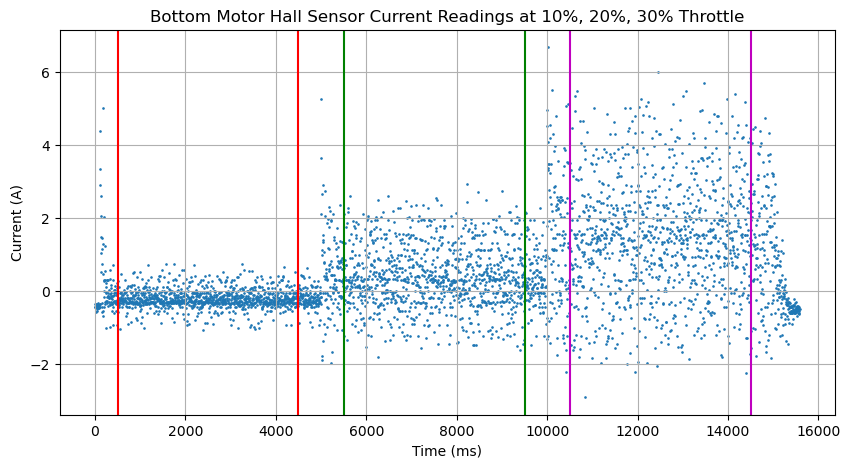

In [8]:
plt.figure(figsize=(10,5))
plt.scatter(time_ms, bot_hall_current, s=0.8)
plt.axvline(throttle_ranges[0][0], color='r')
plt.axvline(throttle_ranges[0][1], color='r')
plt.axvline(throttle_ranges[1][0], color='g')
plt.axvline(throttle_ranges[1][1], color='g')
plt.axvline(throttle_ranges[2][0], color='m')
plt.axvline(throttle_ranges[2][1], color='m')
plt.xlabel("Time (ms)")
plt.ylabel("Current (A)")
plt.title("Bottom Motor Hall Sensor Current Readings at 10%, 20%, 30% Throttle")
plt.grid()
plt.show()

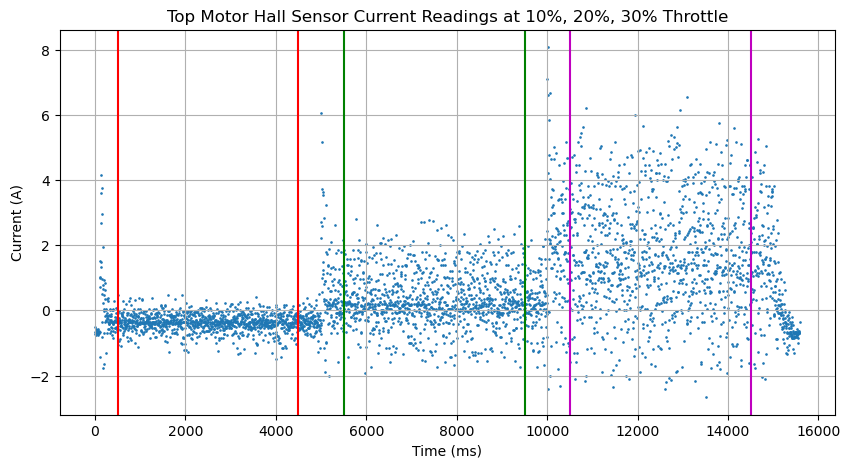

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(time_ms, top_hall_current, s=0.8)
plt.axvline(throttle_ranges[0][0], color='r')
plt.axvline(throttle_ranges[0][1], color='r')
plt.axvline(throttle_ranges[1][0], color='g')
plt.axvline(throttle_ranges[1][1], color='g')
plt.axvline(throttle_ranges[2][0], color='m')
plt.axvline(throttle_ranges[2][1], color='m')
plt.xlabel("Time (ms)")
plt.ylabel("Current (A)")
plt.title("Top Motor Hall Sensor Current Readings at 10%, 20%, 30% Throttle")
plt.grid()
plt.show()

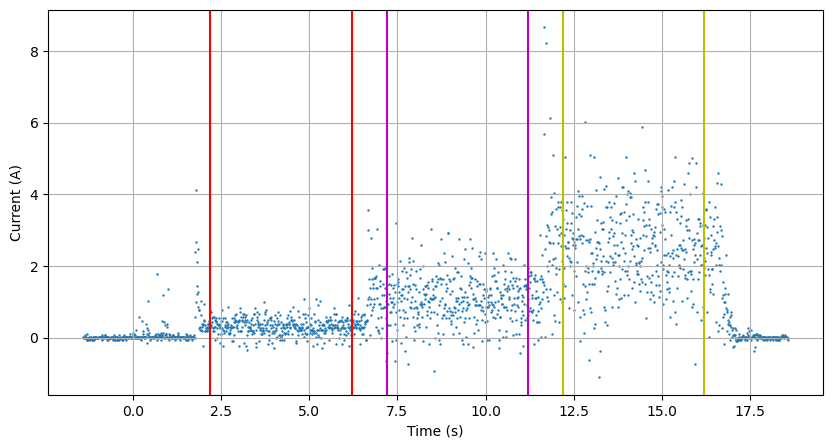

In [10]:
# Load CSV file
top_scope_file = 'top_motor_scope.csv'
top_data = np.genfromtxt(top_scope_file, delimiter=',')

# Separate columns into NumPy arrays
top_scope_time_s = top_data[1:, 0]
top_scope_voltage_V = top_data[1:, 2]
top_scope_current_A = top_data[1:, 1]

# Set time intervals based on throttle changes
scope_throttle_ranges = [[2.2, 6.2],[7.2, 11.2],[12.2, 16.2]]

plt.figure(figsize=(10, 5))
plt.scatter(top_scope_time_s, top_scope_current_A, s=0.5)
plt.axvline(scope_throttle_ranges[0][0], color='r')
plt.axvline(scope_throttle_ranges[0][1], color='r')
plt.axvline(scope_throttle_ranges[1][0], color='m')
plt.axvline(scope_throttle_ranges[1][1], color='m')
plt.axvline(scope_throttle_ranges[2][0], color='y')
plt.axvline(scope_throttle_ranges[2][1], color='y')
plt.xlabel("Time (s)")
plt.ylabel("Current (A)")
plt.grid()

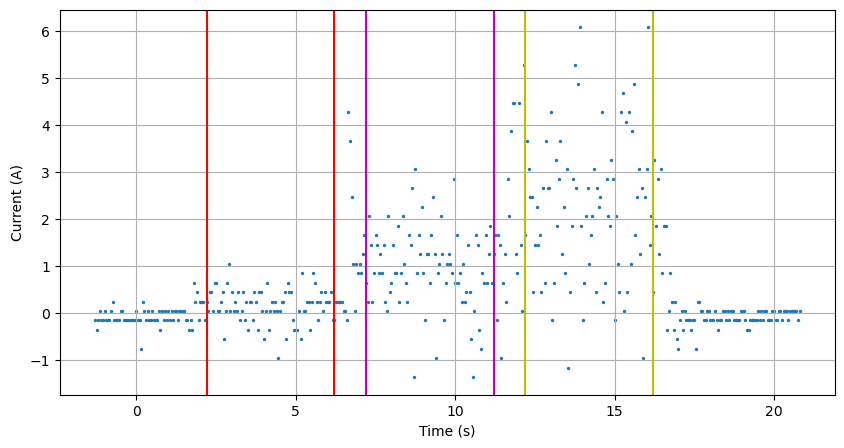

In [11]:
# Load CSV file
bottom_scope_file = 'bottom_motor_scope.csv'
bottom_data = np.genfromtxt(bottom_scope_file, delimiter=',')

# Separate columns into NumPy arrays
bottom_scope_time_s = bottom_data[175:-100, 0]
bottom_scope_voltage_V = bottom_data[175:-100, 2]
bottom_scope_current_A = bottom_data[175:-100, 1]

plt.figure(figsize=(10, 5))
plt.scatter(bottom_scope_time_s, bottom_scope_current_A, s=2)
plt.axvline(scope_throttle_ranges[0][0], color='r')
plt.axvline(scope_throttle_ranges[0][1], color='r')
plt.axvline(scope_throttle_ranges[1][0], color='m')
plt.axvline(scope_throttle_ranges[1][1], color='m')
plt.axvline(scope_throttle_ranges[2][0], color='y')
plt.axvline(scope_throttle_ranges[2][1], color='y')
plt.xlabel("Time (s)")
plt.ylabel("Current (A)")
plt.grid()

In [12]:
bot_current_scope = [np.mean(bottom_scope_current_A[np.argmin(np.abs(bottom_scope_time_s-scope_throttle_ranges[0][0])):np.argmin(np.abs(bottom_scope_time_s-scope_throttle_ranges[0][1]))]),
                    np.mean(bottom_scope_current_A[np.argmin(np.abs(bottom_scope_time_s-scope_throttle_ranges[1][0])):np.argmin(np.abs(bottom_scope_time_s-scope_throttle_ranges[1][1]))]),
                    np.mean(bottom_scope_current_A[np.argmin(np.abs(bottom_scope_time_s-scope_throttle_ranges[2][0])):np.argmin(np.abs(bottom_scope_time_s-scope_throttle_ranges[2][1]))])]

top_current_scope = [np.mean(top_scope_current_A[np.argmin(np.abs(top_scope_time_s-scope_throttle_ranges[0][0])):np.argmin(np.abs(top_scope_time_s-scope_throttle_ranges[0][1]))]),
                    np.mean(top_scope_current_A[np.argmin(np.abs(top_scope_time_s-scope_throttle_ranges[1][0])):np.argmin(np.abs(top_scope_time_s-scope_throttle_ranges[1][1]))]),
                    np.mean(top_scope_current_A[np.argmin(np.abs(top_scope_time_s-scope_throttle_ranges[2][0])):np.argmin(np.abs(top_scope_time_s-scope_throttle_ranges[2][1]))])]

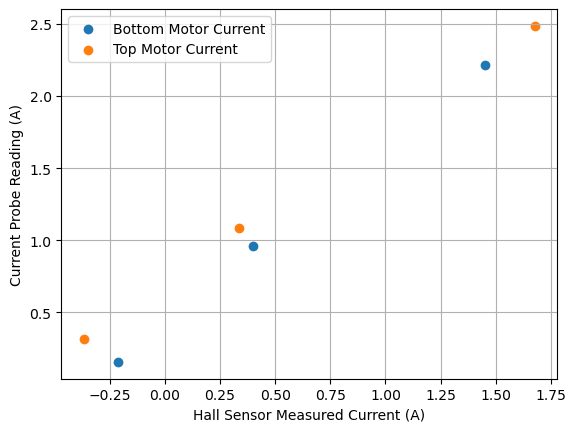

In [13]:
plt.figure()
plt.scatter(bot_current_mean, bot_current_scope, label="Bottom Motor Current")
plt.scatter(top_current_mean, top_current_scope, label="Top Motor Current")
plt.xlabel("Hall Sensor Measured Current (A)")
plt.ylabel("Current Probe Reading (A)")
plt.legend()
plt.grid()
plt.show()

In [14]:
def calibrated_current(measured_current, gain, offset):
    return gain * measured_current + offset

In [15]:
from scipy.optimize import curve_fit

In [16]:
bot_popt,_ = curve_fit(calibrated_current, bot_current_mean, bot_current_scope)
top_popt,_ = curve_fit(calibrated_current, top_current_mean, top_current_scope)
current = np.linspace(-0.5, 3, 2)

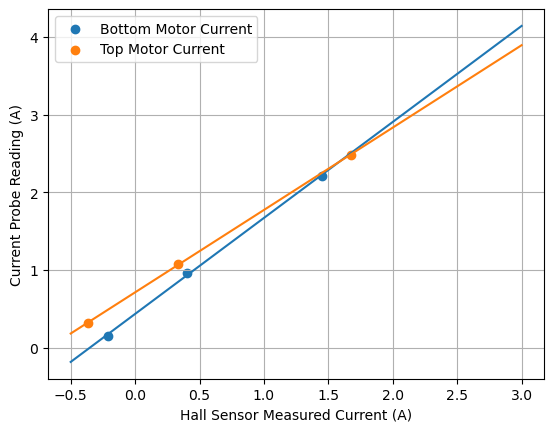

In [17]:
plt.figure()
plt.scatter(bot_current_mean, bot_current_scope, label="Bottom Motor Current")
plt.scatter(top_current_mean, top_current_scope, label="Top Motor Current")
plt.plot(current, calibrated_current(current, bot_popt[0], bot_popt[1]))
plt.plot(current, calibrated_current(current, top_popt[0], top_popt[1]))

plt.xlabel("Hall Sensor Measured Current (A)")
plt.ylabel("Current Probe Reading (A)")
plt.legend()
plt.grid()
plt.show()

In [18]:
print("Top Motor Calibration: " + str(top_popt[0]) + " I + " + str(top_popt[1]))
print("Bottom Motor Calibration: " + str(bot_popt[0]) + " I + " + str(bot_popt[1]))

Top Motor Calibration: 1.059398360263953 I + 0.7139455464500624
Bottom Motor Calibration: 1.2346053408023316 I + 0.4362709152016776


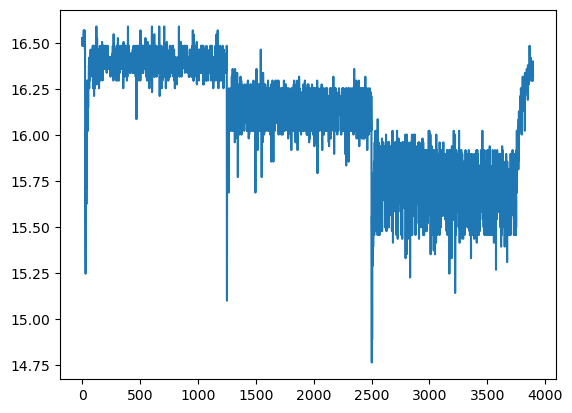

In [19]:

vbat = bot_motor_data["batt_voltage_V"]
vbat_scope = bottom_scope_voltage_V

plt.plot(vbat)

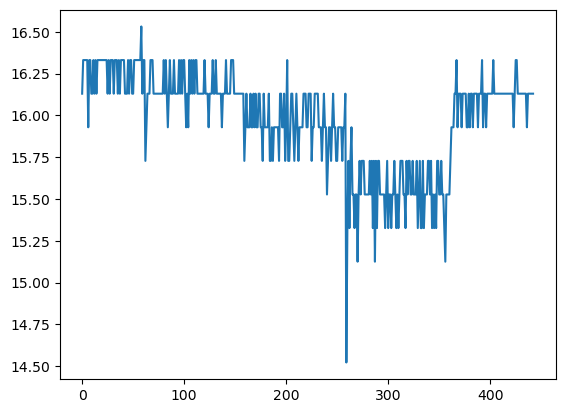

In [20]:
plt.plot(vbat_scope)